# K Means Clustering


K Means Clustering é um algoritmo de aprendizagem não supervisionado que tenta agrupar dados com base em sua similaridade. 

Aprendizagem não supervisionada significa que não há resultado a ser previsto e o algoritmo apenas tenta encontrar padrões nos dados. 

Em k means clustering, temos que especificar o número de clusters em que queremos que os dados sejam agrupados.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/K_Means_Example_Step_1.svg/800px-K_Means_Example_Step_1.svg.png" width="200" height="100"/>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/K_Means_Example_Step_2.svg/800px-K_Means_Example_Step_2.svg.png" width="200" height="100"/>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/K_Means_Example_Step_3.svg/800px-K_Means_Example_Step_3.svg.png" width="200" height="100"/>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/K_Means_Example_Step_4.svg/800px-K_Means_Example_Step_4.svg.png" width="200" height="100"/>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from plotnine import *

In [2]:
df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")
df = df[['sepal_length','sepal_width','petal_length','petal_width']]

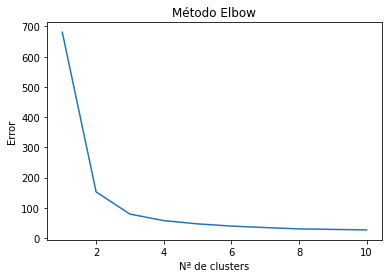

In [3]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(df)
    kmeans.fit(df)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Método Elbow')
plt.xlabel('Nª de clusters')
plt.ylabel('Error')
plt.show()

In [8]:
y_kmeans = KMeans(n_clusters = 3).fit_predict(df)

In [9]:
df['cluster'] = y_kmeans
df

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


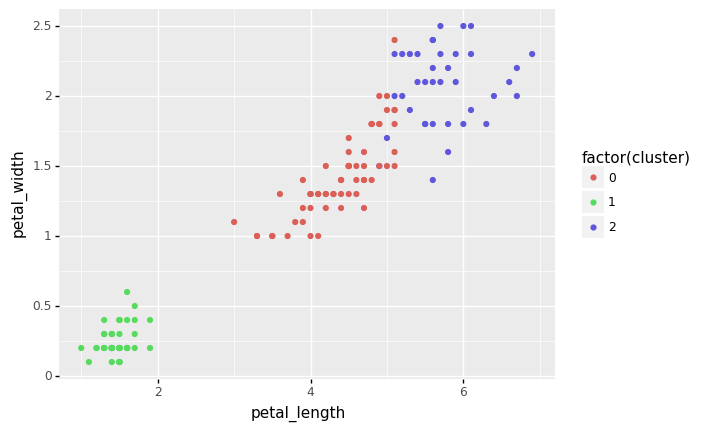

<ggplot: (8760829264544)>

In [10]:
(ggplot(df, aes('petal_length', 'petal_width', color='factor(cluster)'))
 + geom_point())